# Lista de Exercícios VI

* Aluno : Gabriel Wendell Celestino Rocha
* Matrícula :  20190112149 

* Disciplina : Física Computacional I
* Professor : Leonardo Machado
* Data de Entrega : 23/10/2020

In [2]:
# Essas constantes serão usadas no Problema 3.
from scipy.constants import k,c,h

import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

## Problema 1

### Letra a)

Considere o polinômio do 6º grau abaixo

$$P(x)=924x^{6}-2772x^{5}+3150x^{4}-1680x^{3}+420x^{2}-42x+1$$

Desejamos obter as raízes de $x_{i}$, $i=1,2,\ldots,6$. Para isso, vamos plotar a nossa função $P(x)$, plotar uma reta horizontal em $y=0$ e com base no plot estimar os valores de em que $P(x)=0$.

Primeiramente, como de costume, vamos definir uma função `opt_plot()` para melhorar a estética dos plots:

In [3]:
def opt_plot():
        plt.minorticks_on()
        plt.tick_params(axis='both',which='minor', direction = "in",
                        top = True,right = True, length=5,width=1,labelsize=15)
        plt.tick_params(axis='both',which='major', direction = "in",
                        top = True,right = True, length=8,width=1,labelsize=15)

Agora vamos definir uma função `P(x)` que irá retornar o nosso polinômio $P(x)$

In [4]:
def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1

Agora vamos definir o espaço de nosso plot. Vamos variar $x$ no intervalo $[0,1]$ igualmente espaçado em 100.

In [5]:
x = np.linspace(0,1,100)

Finalmente, vamos ao plot

<IPython.core.display.Javascript object>


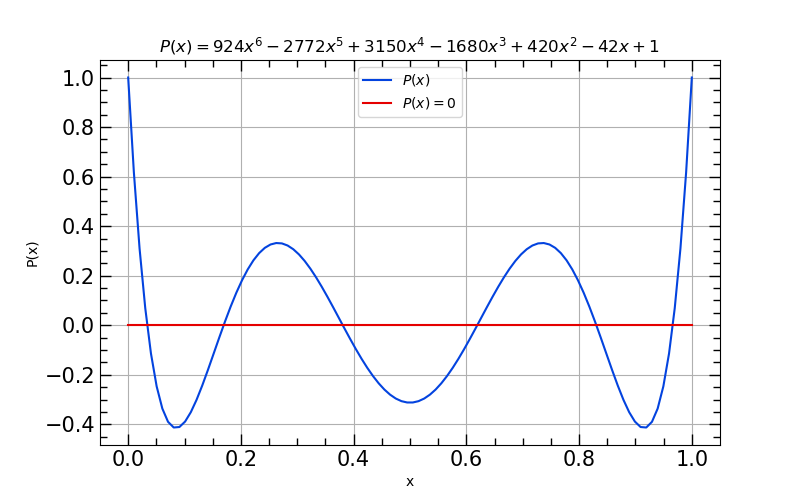

In [6]:
plt.figure(figsize=(8,5))
plt.plot(x, P(x), color='xkcd:blue', label=r'$P(x)$')
plt.plot(x, 0*x, color='xkcd:red', label=r'$P(x)=0$')
plt.title(r'$P(x)=924x^{6}-2772x^{5}+3150x^{4}-1680x^{3}+420x^{2}-42x+1$')
plt.xlabel('x')
plt.ylabel('P(x)')
plt.legend(loc='best')
plt.grid()
opt_plot()

Pelo gráfico podemos notar que os zeros de $P(x)$ estão em torno dos pontos $x=0.0$, $x=0.2$, $x=0.4$, $x=0.6$, $x=0.0$ e $x=1.0$.

### Letra b)

Agora vamos determinar as raízes de $P(x)$ usando o método de Newton. Primeiramente, vamos definir uma função chamada `Newton(x0, f, f_prime, eps)` que irá implementar o método de Newton.

In [7]:
def Newton(x0, f, f_prime, eps):
    x = x0 - f(x0)/f_prime(x0)
    error = abs(x - x0)
    
    while eps < error:
        x0 = x
        x = x0 - f(x0)/f_prime(x0)
        error = abs(x - x0)
        
    return x0

O método de Newton consiste em um método iterativo para determinar as raízes de um polinômio qualquer. Nesse método, se inicia com uma estimativa inicial `x0` e é calculada uma nova estimativa usando a função `f(x)` tal que `f(x)==0`, e a primeira derivada de `f`, que é justamente `f_prime`. O método então calcular repetidamente uma nova estimativa da raiz $x$ até um erro de $\varepsilon$.

Agora vamos definir a derivada $P'(x)$ e implementá-la por meio de uma função chamada `P_prime(x)`:

$$P(x)=924x^{6}-2772x^{5}+3150x^{4}-1680x^{3}+420x^{2}-42x+1\implies$$

$$P'(x)=6\cdot924x^{5}-5\cdot2772x^{4}+4\cdot3150x^{3}-3\cdot1680x^{2}+2\cdot420x-42$$

In [8]:
def P_prime(x):
    return 6*924*x**5 - 5*2772*x**4 + 4*3150*x**3 - 3*1680*x**2 + 2*420*x - 42

Agora vamos determinar as raízes $x_{i}$, $i=1,2,\ldots,6$ usando o método de Newton:

In [9]:
x1 = Newton(0. , P , P_prime , 1e-10)
x2 = Newton(0.2 , P , P_prime , 1e-10)
x3 = Newton(0.4 , P , P_prime , 1e-10)
x4 = Newton(0.6 , P , P_prime , 1e-10)
x5 = Newton(0.8 , P , P_prime , 1e-10)
x6 = Newton(1. , P , P_prime , 1e-10)

Por fim, vamos printar as raízes:

In [10]:
print('As raízes são:', '\n', 'x1 =', x1, '\n', 'x2 =', x2,
      '\n', 'x3 =', x3, '\n', 'x4 =', x4, '\n', 'x5 =', x5, 
      '\n', 'x5 =', x5)

As raízes são: 
 x1 = 0.033765242898423545 
 x2 = 0.16939530676686765 
 x3 = 0.3806904069583867 
 x4 = 0.6193095930416064 
 x5 = 0.8306046932330717 
 x5 = 0.8306046932330717


$\text{ }$

## Problema 2

### Letra a)

Primeiramente, vamos orientar o sentido positivo do eixo $Ox$ como sendo o sentido no qual ele aponta em direção à Terra. Sendo $F_{Terra}$ e $F_{Lua}$ as forças de atração gravitacional que agem sobre o satélite da Terra e da Lua, respectivamente, podemos escrever:

$$F=F_{Terra}-F_{Lua}=\frac{GMm'}{d_{Terra}}-\frac{Gmm'}{d_{Lua}}$$

onde $m'$ é a massa do satélite e $M$ e $m$ são as massas da Terra e da Lua, respectivamente. Além disso, as distâncias $d_{Terra}$ e $d_{Lua}$ são as distâncias do satélite até a Terra e do satélite até a Lua, respectivamente. Dessa forma, obtemos:

$$F=\frac{GMm'}{r^{2}}-\frac{Gmm'}{(R-r)^{2}}$$

Desde que o satélite esteja orbitando o ponto de Lagrange $L_{1}$, ele irá oscilar com uma frequância angular $\omega$ em torno do mesmo ponto, logo

$$F=m\omega^{2}r$$

Finalmente, igualando as duas forças $F$ obtemos:

$$\boxed{\frac{GM}{r^{2}}-\frac{Gm}{(R-r)^{2}}=\omega^{2}r}$$

$\blacksquare$

### Letra b)

Primeiramente, vamos definir algumas constantes que serão usadas na solução do problema:

In [11]:
G = 6.674e-11    # Constante gravitacional de Newton. 
M = 5.974e24     # Massa da Terra.
m = 7.348e22     # Massa da Lua.
R = 3.844e8      # Distância da Terra até a Lua.
w = 2.662e-6     # Velocidade angular do satélite.

Agora vamos definir uma função `F(r)` que irá retornar o valor de $F$ para quando $F=0$ (basta passar o termo $\omega^{2}r$ do lado direito da equação subtraindo para o lado esquerdo):

In [12]:
def F(r):
    return G*M/r/r - G*m/(R-r)**2 - w*w*r

Agora definimos outra função chamada `F_prime(r)` que irá retornar a derivada da função `F(r)`:

In [13]:
def F_prime(r):
    return -2*G*M/r**3 - 2*G*m/(R-r)**3 - w*w

Vamos definir o espaço de pontos que usaremos em nosso plot:

In [14]:
r = np.linspace(100000000 , 500000000 , 100)

Por fim, vamos ao plot...

<IPython.core.display.Javascript object>


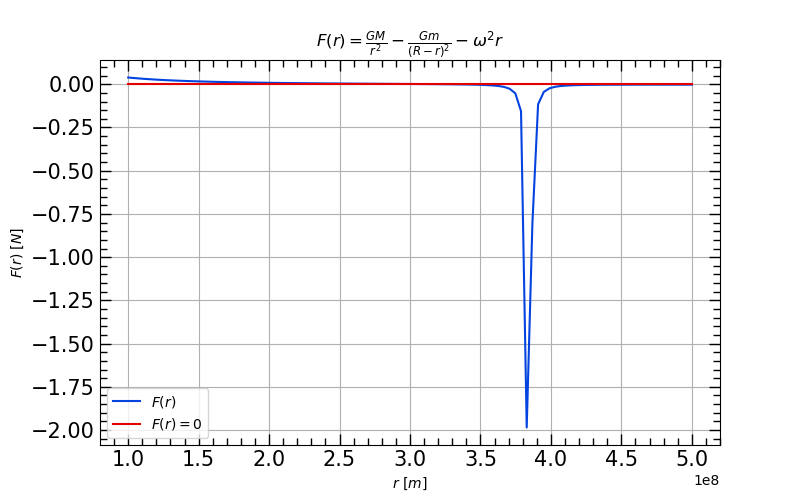

In [15]:
plt.figure(figsize=(8,5))
plt.plot(r, F(r), color='xkcd:blue', label=r'$F(r)$')
plt.plot(r, 0*r, color='xkcd:red', label=r'$F(r)=0$')
plt.title(r'$F(r)=\frac{GM}{r^{2}}-\frac{Gm}{(R-r)^{2}}-\omega^{2}r$')
plt.xlabel(r'$r$ $[m]$')
plt.ylabel(r'$F(r)$ $[N]$')
plt.legend(loc='best')
plt.grid()
opt_plot()

Agora definiremos uma função chamada `secante(x1, x2, f, eps)` que irá implementar o método da secante.

In [16]:
def secante(x1, x2, f, eps):
    x3 = x2 - f(x2) * (x2 - x1) / (f(x2) - f(x1))
    error = abs (x3-x2)
    
    while eps < error:
        x1 = x2
        x2 = x3
        x3 = x2 - f(x2) * (x2 - x1) / (f(x2) - f(x1))
        error = abs (x3-x2)
    
    return x3

O método da secante consiste em um método iterativo que se inicia com duas suposições `x1` e `x2` e calcula uma nova estimativa usando a função `f(x)` de modo que `f(x)==0`. O método então calcular repetidamente uma nova estimativa da raiz $x$ até um erro de $\varepsilon$.

Agora vamos aplicar o método da secante:

In [17]:
secante(200000000, 350000000, F, 1e-10)

326045071.66535544

Por fim, vamos aplicar o método de Newton para podermos comparar os resultados:

In [18]:
Newton(300000000, F, F_prime, 1e-10)

326045071.66535544

Note que os resultados são praticamente iguais em ambos os métodos.

$\text{ }$

## Problema 3

### Letra a)

Vamos implementar o método da quadratura gaussiana por meio das funções `gausswx(N)` e `gaussxwab(N,a,b)`:

In [19]:
def gausswx(N):
    
    # Aproximação inicial das raízes do polinômio de Legendre.
    a = np.linspace(2,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))
    
    # Agora vamos achar as raízes usando o Método de Newton.
    epsilon = 1e-15
    delta = 1.0
    
    while delta > epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        
        for i in range(1,N):
            p0,p1 = p1,((2*i+1)*x*p1-i*p0)/(i+1)
            
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))
        
    # Por fim vamos calcular os pesos
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)
    
    return x,w

def gaussxwab(N,a,b):
    x,w = gausswx(N)
    
    return 0.5*(b-a)*x+0.5*(b+a), 0.5*(b-a)*w

Agora definiremos algumas constantes:

In [20]:
N = 100
lambda1 = 390e-9             # [m]
lambda2 = 750e-9             # [m]
constant = 15/np.pi**4
low_limit = h*c/(lambda2*k)   # excluindo T, o colocaremos mais adiante
high_limit = h*c/(lambda1*k)  # excluindo T, o colocaremos mais adiante

Agora definimos a função que será o integrando:

In [21]:
def f(x):
    return x**3/(np.exp(x)-1)

Aqui aplicaremos a quadratura gaussiana para resolver a integral (incluído na função $\eta$): 

In [22]:
def eta(T):
    x, w = gaussxwab(N, low_limit/T, high_limit/T) # Adicionado em T para os limites
    
    Int = 0.0
    for i in range(N):
        Int += w[i]*f(x[i])
        
    return constant*Int

Agora vamos definir o espaço de pontos que serão usados no cálculos dos $\eta$:

In [23]:
T = np.linspace(300, 10000, 100)

eta_vals = [] # Array vazio apenas para armazenar os valores calculados de eta

for i in T:
    e = eta(i)
    
    eta_vals.append(e)

Por fim, vamos ao plot...

<IPython.core.display.Javascript object>


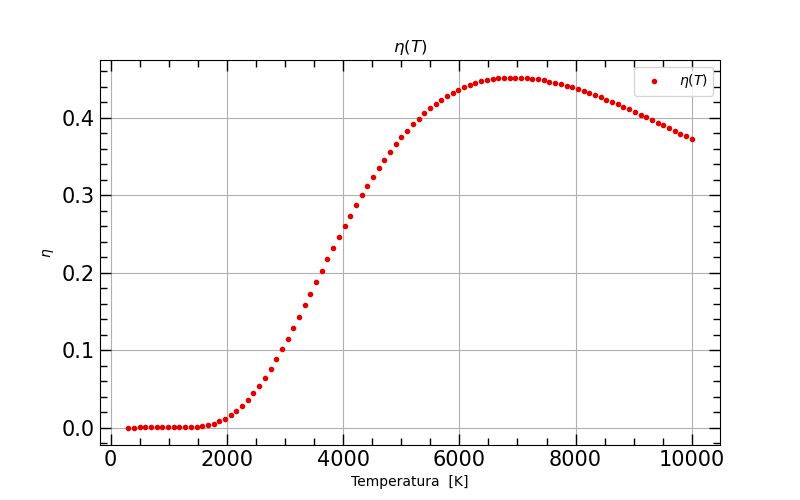

In [24]:
plt.figure(figsize=(8,5))
plt.plot(T, eta_vals, '.', color='xkcd:red', label=r'$\eta(T)$')
plt.title('$\eta(T)$')
plt.xlabel('Temperatura  [K]')
plt.ylabel('$\eta$')
plt.legend(loc='best')
plt.grid()
opt_plot()

Note que a eficiência máxima $\eta_{máx.}$ ocorre em torno do ponto em que $T=7000$ $K$, ou seja

$$\eta_{máx.}\sim 7000\text{ }K$$

### Letra b)

Primeiramente vamos definir duas constantes importantes, a primeira será a proporção áurea (ou número de ouro) $\varphi=\frac{1+\sqrt{5}}{2}$ e a nossa precisão alvo $\varepsilon$:

In [25]:
z = (1 + np.sqrt(5)) / 2 
epsilon = 1 

Vamos escolher dois pontos externos iniciais, $x_{1}$ e $x_{4}$ e em seguida calcular os pontos internos usando a regra da proporção áurea:

In [26]:
T1 = 6000                # [K]
T4 = 8000                # [K]

T2 = T4-(T4-T1)/z
T3 = T4+(T4-T1)/z

Agora calculamos $\eta$ em cada ponto

In [27]:
eta1 = eta(T1)
eta2 = eta(T2)
eta3 = eta(T3)
eta4 = eta(T4)

Agora fazemos a pesquisa utilizando a proporção áurea:

In [28]:
while (T4 - T1) > epsilon:
    if eta2 < eta3:
        T4, eta4 = T3, eta3
        T3, eta3 = T2, eta2
        T2 = T4 - (T4 - T1) / z
        eta2 = eta(T2)
    else:
        T1, eta1 = T2, eta2
        T2, eta2 = T3, eta3
        T3 = T1 + (T4 - T1) / z
        eta3 = eta(T3)

Agora fazemos a média de $T_{1}$ e $T_{4}$ para assim obter a temperatura na qual $\eta=\eta_{máx.}$:

In [29]:
temp_max_eta = (T1+T4)/2

Finalmente, vamos printar o nosso resultado:

In [30]:
print("Temperatura de eficiência máxima =", temp_max_eta, '[K]')

Temperatura de eficiência máxima = 7235.961014189429 [K]


### Letra c)

Definitivamente não é prático!

Sabe-se que o tungstênio (W) tem seu ponto de fusão em torno de $3700$ $K$. Além disso, as lâmpadas incandescentes normais atingem temperaturas máximas da ordem de $2800$ $K$. Ou seja, uma lâmpada incandescente, que são conhecidas por atingirem altas temperaturas nunca atingem sua eficiência máxima.

$\text{ }$